# ***Libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
toyota=pd.read_csv("ToyotaCorolla.csv", encoding="unicode_escape")
toyota.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


As we need to consider only Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] columns so dropped remaining

In [3]:
corolla=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [5]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
corolla.duplicated().sum()
#one Duplicate entry found and removed it too.

1

In [7]:
corolla=corolla.drop_duplicates()

In [8]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [9]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


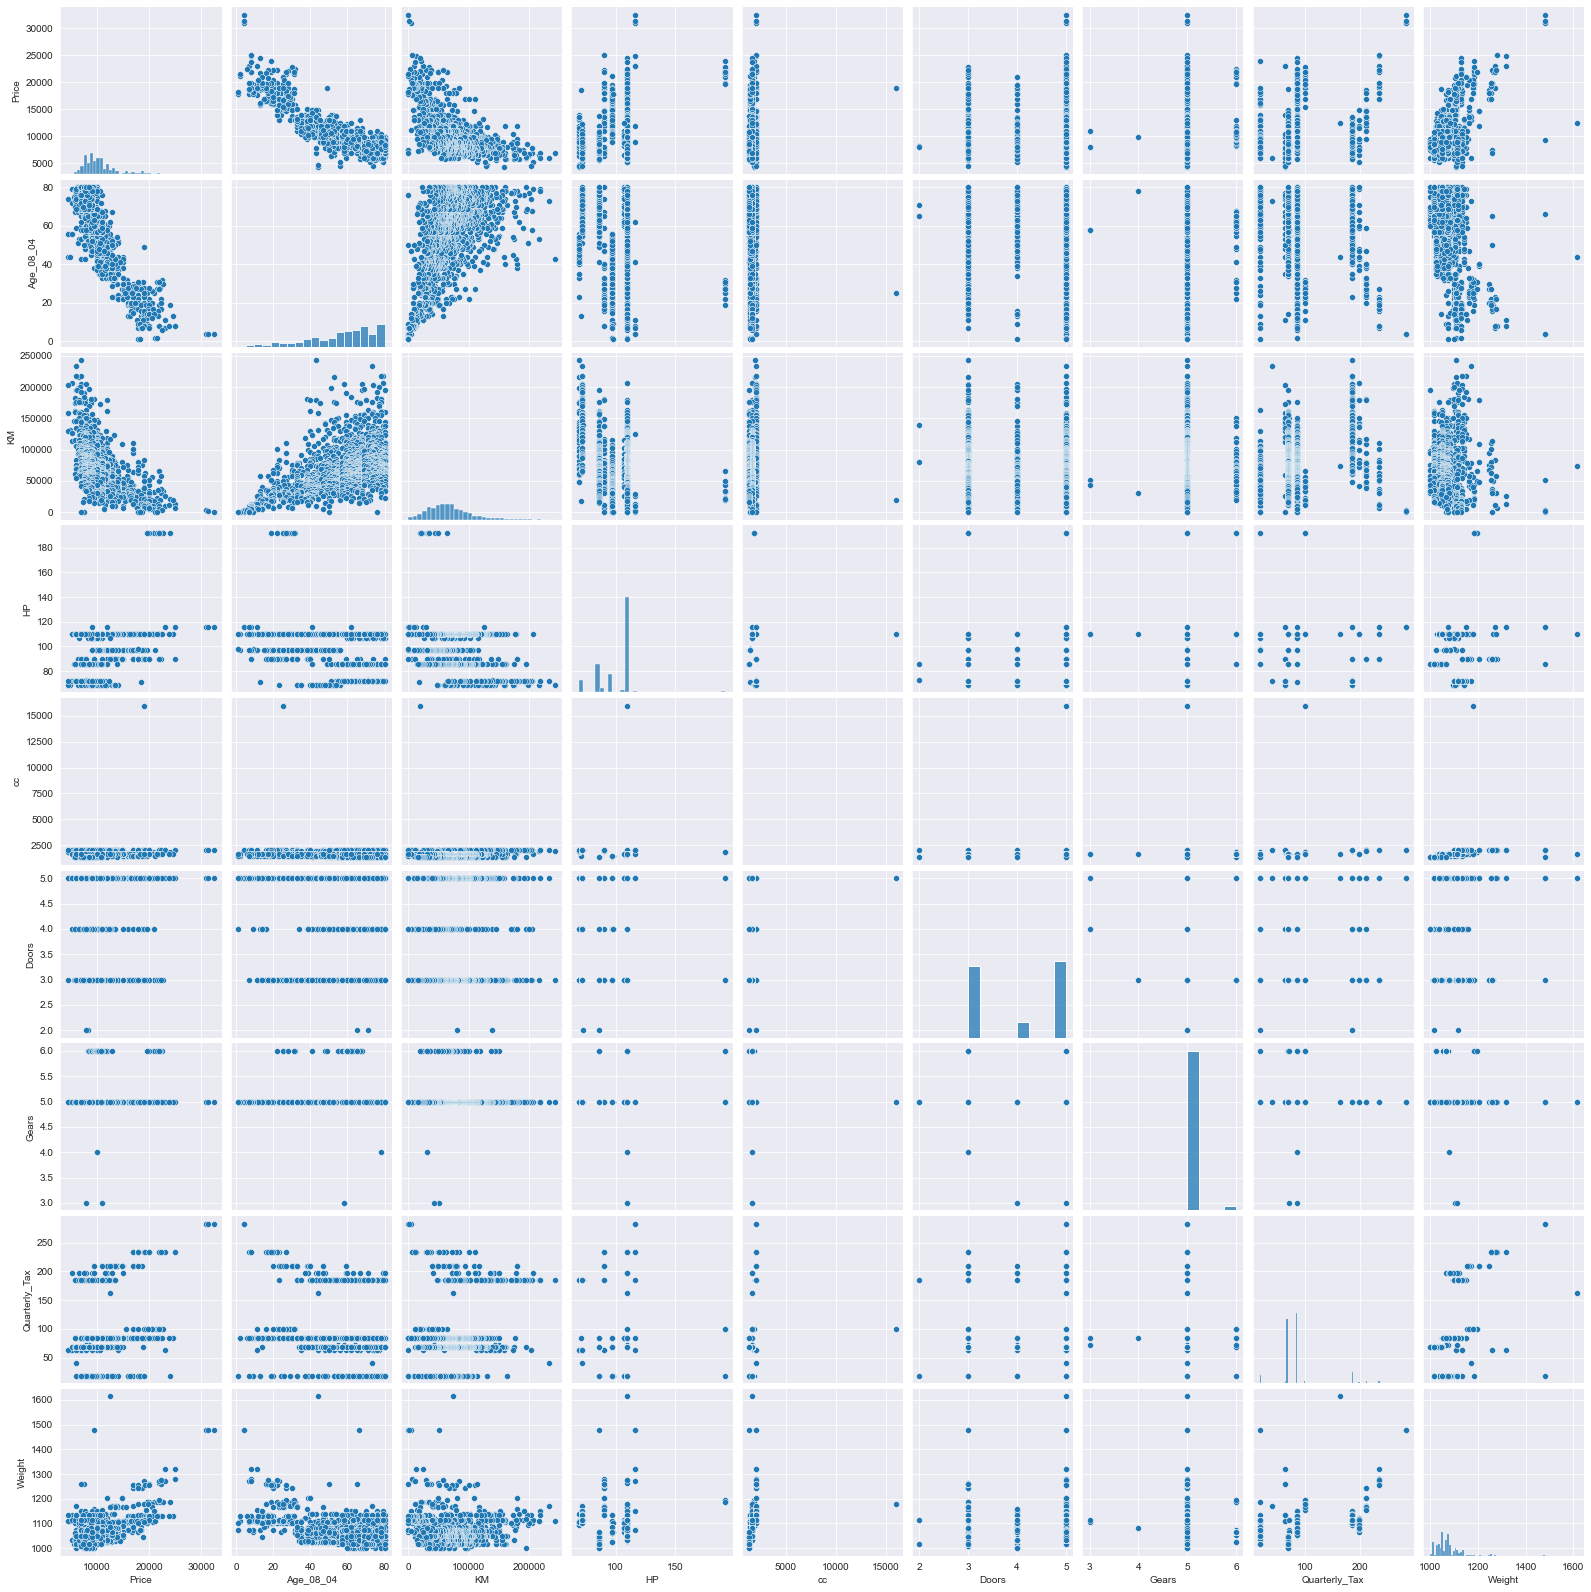

In [10]:
sns.set_style(style="darkgrid")
sns.pairplot(corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f315cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x138f3164610>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f315cb20>,
 'medians': [<matplotlib.lines.Line2D at 0x138f3164d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x138f316e100>,
 'means': []}

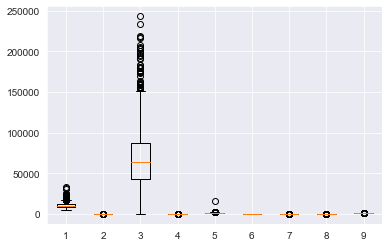

In [11]:
plt.boxplot(corolla)

As from the above boxplot we found that dataset has many outliers for each column

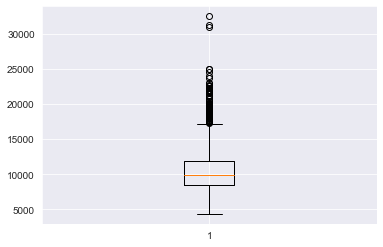

In [12]:
price_boxplot=plt.boxplot(corolla["Price"])

In [13]:
price_outliers=pd.DataFrame([item.get_ydata()for item in price_boxplot["fliers"]])
price_outliers
price_outliers.transpose()

,0
0,18600
1,21500
2,20950
3,19950
4,19600
...,...
104,21125
105,21500
106,17795
107,18245


In [14]:
[item.get_ydata()[1] for item in price_boxplot['whiskers']]

[4350.0, 17200.0]

Dropping price column's outliers as they are far away from the whiskers

In [15]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [16]:
corolla=corolla.loc[corolla["Price"]<17200]

In [17]:
corolla.shape

(1325, 9)

In [18]:
corolla


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [19]:
corolla=corolla.reset_index()


In [20]:
corolla.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [21]:
corolla.drop("index", axis=1, inplace= True)

In [22]:
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1320,7500,69,20544,86,1300,3,5,69,1025
1321,10845,72,19000,86,1300,3,5,69,1015
1322,8500,71,17016,86,1300,3,5,69,1015
1323,7250,70,16916,86,1300,3,5,69,1015


{'whiskers': [<matplotlib.lines.Line2D at 0x138f3c90af0>,
 'caps': [<matplotlib.lines.Line2D at 0x138f3ca0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f3c90760>,
 'medians': [<matplotlib.lines.Line2D at 0x138f3ca0970>,
 'fliers': [<matplotlib.lines.Line2D at 0x138f3ca0d00>,
 'means': []}

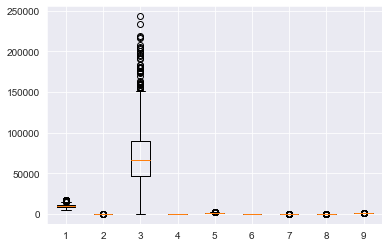

In [23]:
plt.boxplot(corolla)

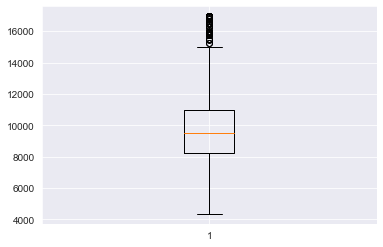

In [24]:
N_priceboxplot=plt.boxplot(corolla["Price"])

In [25]:
[item.get_ydata()for item in N_priceboxplot["fliers"]]

[array([16900, 16750, 16950, 15950, 16950, 15950, 16950, 16250, 15950,
        15750, 16950, 15750, 15950, 15500, 15750, 15950, 15750, 16750,
        16950, 16950, 15800, 15750, 15500, 15250, 15250, 15999, 16500,
        16950, 15950, 15950, 15750, 16950, 16895, 15450, 16650, 15950,
        16450, 15950, 15950, 15950, 16250, 16950, 16350, 16950, 15950,
        16500, 15850, 16250, 15950, 16250, 15950, 16500, 16500, 16250,
        16450, 16450, 16868], dtype=int64)]

In [26]:
[item.get_ydata()[1] for item in N_priceboxplot['whiskers']]

[4350.0, 14990.0]

In [27]:
(np.where(corolla["Price"]>14990))

(array([ 6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 26,
        29, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42, 44, 45, 47, 48, 49, 51,
        52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75], dtype=int64),)

In [28]:
corolla=corolla.loc[corolla["Price"]<=14990]

In [29]:
corolla.shape

(1268, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f3e0bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x138f3e1d520>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f3e0ba30>,
 'medians': [<matplotlib.lines.Line2D at 0x138f3e1dc40>,
 'fliers': [<matplotlib.lines.Line2D at 0x138f3e1dfd0>,
 'means': []}

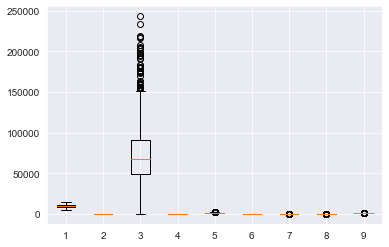

In [30]:
plt.boxplot(corolla)

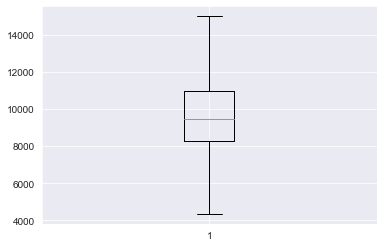

In [31]:
N_priceboxplot=plt.boxplot(corolla["Price"])

In [32]:
corolla.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


outlier treatment for Age column

{'whiskers': [<matplotlib.lines.Line2D at 0x138f3f96bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x138f3fa4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f3f96820>],
 'medians': [<matplotlib.lines.Line2D at 0x138f3fa4a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f3fa4dc0>],
 'means': []}

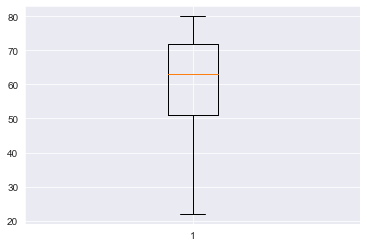

In [33]:
plt.boxplot(corolla["Age_08_04"])

Age column doesn't have any outlier now as while treating the outlier for Price column it got treated as well

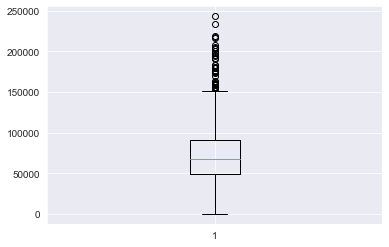

In [34]:
km_column=plt.boxplot(corolla["KM"])

In [35]:
[item.get_ydata()for item in km_column["fliers"]]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900], dtype=int64)]

In [36]:
[item.get_ydata()[1] for item in km_column['whiskers']]

[1.0, 151300.0]

In [37]:
[item.get_ydata()[1] for item in km_column['whiskers']][1]

151300.0

In [38]:
corolla=corolla.loc[corolla["KM"]<=151300]
corolla.shape


(1219, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f406f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x138f406f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f4061e20>],
 'medians': [<matplotlib.lines.Line2D at 0x138f407b070>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f407b400>],
 'means': []}

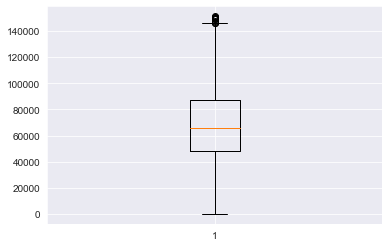

In [39]:
plt.boxplot(corolla["KM"])

defining a function to remove outlier from KM column

In [40]:
def outlier_km(corolla):
    km_column=plt.boxplot(corolla["KM"])
    [item.get_ydata()for item in km_column["fliers"]]
    whisker=[item.get_ydata()[1] for item in km_column['whiskers']][1]
    while whisker<corolla["KM"].max():
        corolla=corolla.loc[corolla["KM"]<=whisker]
        km_column=plt.boxplot(corolla["KM"])
        [item.get_ydata()for item in km_column["fliers"]]
        whisker=[item.get_ydata()[1] for item in km_column['whiskers']][1]
    return corolla
        
        
    
    

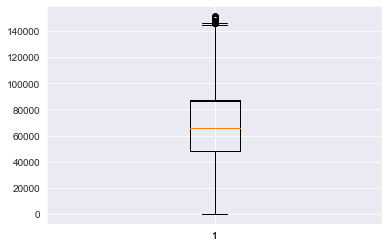

In [41]:
corolla=outlier_km(corolla=corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f4171670>,
 'caps': [<matplotlib.lines.Line2D at 0x138f4171d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f41712e0>],
 'medians': [<matplotlib.lines.Line2D at 0x138f417b4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f417b880>],
 'means': []}

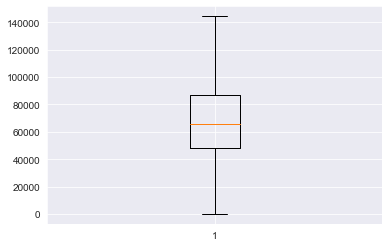

In [42]:
plt.boxplot(corolla["KM"])

In [43]:
corolla.shape

(1207, 9)

In [44]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


{'whiskers': [<matplotlib.lines.Line2D at 0x138f41d5a00>,
 'caps': [<matplotlib.lines.Line2D at 0x138f41e4160>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f41d5670>,
 'medians': [<matplotlib.lines.Line2D at 0x138f41e4880>,
 'fliers': [<matplotlib.lines.Line2D at 0x138f41e4c10>,
 'means': []}

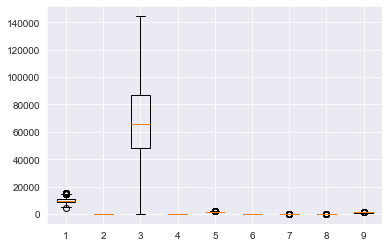

In [45]:
plt.boxplot(corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f42fad00>,
 'caps': [<matplotlib.lines.Line2D at 0x138f430b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f42fa970>],
 'medians': [<matplotlib.lines.Line2D at 0x138f430bb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f430bf10>],
 'means': []}

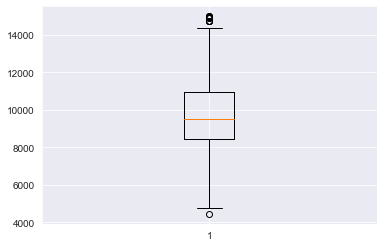

In [46]:
plt.boxplot(corolla["Price"])

In [47]:
def outlier_Price(corolla):
    km_column=plt.boxplot(corolla["Price"])
    [item.get_ydata()for item in km_column["fliers"]]
    whisker=[item.get_ydata()[1] for item in km_column['whiskers']][1]
    while whisker<corolla["Price"].max():
        corolla=corolla.loc[corolla["Price"]<=whisker]
        km_column=plt.boxplot(corolla["Price"])
        [item.get_ydata()for item in km_column["fliers"]]
        whisker=[item.get_ydata()[1] for item in km_column['whiskers']][1]
    return corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1320,7500,69,20544,86,1300,3,5,69,1025
1321,10845,72,19000,86,1300,3,5,69,1015
1322,8500,71,17016,86,1300,3,5,69,1015
1323,7250,70,16916,86,1300,3,5,69,1015


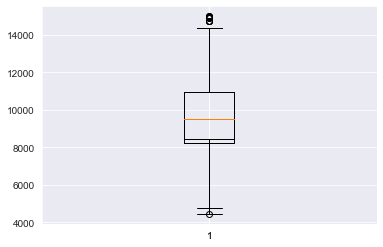

In [48]:
outlier_Price(corolla)

## Custom Fuctions to detect outliers and remove them

In [49]:
def outlier_Price(corolla):
    column=plt.boxplot(corolla["Price"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["Price"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["Price"]<=whisker]
        column=plt.boxplot(corolla["Price"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["Price"].max()
        column=plt.boxplot(corolla1["Price"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [50]:
def outlier_age(corolla):
    column=plt.boxplot(corolla["Age_08_04"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]]
    c_max=corolla["Age_08_04"].max()
    c_min=corolla["Age_08_04"].min()
    while whisker[1] < c_max or whisker[0] > c_min:
        corolla1=corolla.loc[(corolla["Age_08_04"]<=whisker[1]) & (corolla["Age_08_04"]>=whisker[0])]
        column=plt.boxplot(corolla["Age_08_04"])
        [item.get_ydata()for item in column["fliers"]]
        c_max=corolla1["Age_08_04"].max()
        c_min=corolla1["Age_08_04"].max()
        column=plt.boxplot(corolla1["Age_08_04"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]]
        corolla=corolla1
    else:
        return corolla
        

In [51]:
def outlier_km(corolla):
    column=plt.boxplot(corolla["KM"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["KM"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["KM"]<=whisker]
        column=plt.boxplot(corolla["KM"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["KM"].max()
        column=plt.boxplot(corolla1["KM"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [52]:
def outlier_hp(corolla):
    column=plt.boxplot(corolla["HP"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["HP"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["HP"]<=whisker]
        column=plt.boxplot(corolla["HP"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["HP"].max()
        column=plt.boxplot(corolla1["HP"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [53]:
def outlier_cc(corolla):
    column=plt.boxplot(corolla["cc"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["cc"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["cc"]<=whisker]
        column=plt.boxplot(corolla["cc"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["cc"].max()
        column=plt.boxplot(corolla1["cc"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [54]:
def outlier_doors(corolla):
    column=plt.boxplot(corolla["Doors"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["Doors"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["Doors"]<=whisker]
        column=plt.boxplot(corolla["Doors"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["Doors"].max()
        column=plt.boxplot(corolla1["Doors"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [55]:
def outlier_gears(corolla):
    column=plt.boxplot(corolla["Gears"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["Gears"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["Gears"]<=whisker]
        column=plt.boxplot(corolla["Gears"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["Gears"].max()
        column=plt.boxplot(corolla1["Gears"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [56]:
def outlier_tax(corolla):
    column=plt.boxplot(corolla["Quarterly_Tax"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["Quarterly_Tax"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["Quarterly_Tax"]<=whisker]
        column=plt.boxplot(corolla["Quarterly_Tax"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["Quarterly_Tax"].max()
        column=plt.boxplot(corolla1["Quarterly_Tax"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [57]:
def outlier_weight(corolla):
    column=plt.boxplot(corolla["Weight"])
    [item.get_ydata()for item in column["fliers"]]
    whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
    c_max=corolla["Weight"].max()
    while whisker<c_max:
        corolla1=corolla.loc[corolla["Weight"]<=whisker]
        column=plt.boxplot(corolla["Weight"])
        [item.get_ydata()for item in km_column["fliers"]]
        c_max=corolla1["Weight"].max()
        column=plt.boxplot(corolla1["Weight"])
        [item.get_ydata()for item in column["fliers"]]
        whisker=[item.get_ydata()[1] for item in column["whiskers"]][1]
        corolla=corolla1
    else:
        return corolla

In [58]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


{'whiskers': [<matplotlib.lines.Line2D at 0x138f4109310>,
 'caps': [<matplotlib.lines.Line2D at 0x138f4109fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f4109b50>,
 'medians': [<matplotlib.lines.Line2D at 0x138f412a370>,
 'fliers': [<matplotlib.lines.Line2D at 0x138f412abe0>,
 'means': []}

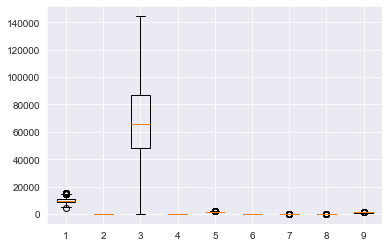

In [59]:
plt.boxplot(corolla)

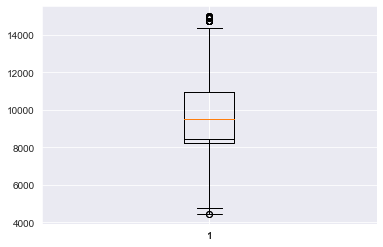

In [60]:
corolla=outlier_Price(corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f43f6f10>,
 'caps': [<matplotlib.lines.Line2D at 0x138f4404670>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f43f6b80>],
 'medians': [<matplotlib.lines.Line2D at 0x138f4404d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f4410160>],
 'means': []}

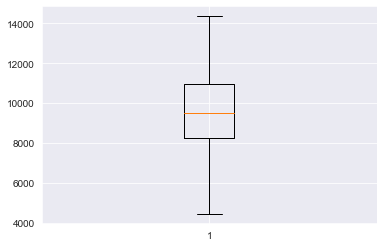

In [61]:
plt.boxplot(corolla['Price'])

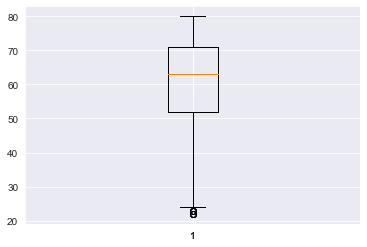

In [62]:
corolla=outlier_age(corolla)

{'whiskers': [<matplotlib.lines.Line2D at 0x138f44fe3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x138f44feac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x138f44eefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x138f4507220>],
 'fliers': [<matplotlib.lines.Line2D at 0x138f45075b0>],
 'means': []}

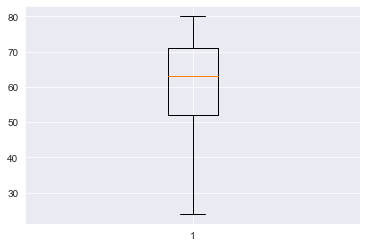

In [63]:
plt.boxplot(corolla["Age_08_04"])

In [64]:
corolla.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
2,13950,24,41711,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [65]:
corolla.shape

(1184, 9)